In [ ]:
# things to think about when making the ML pipeline 

# preprocessing
# impute na in race to "unknown" (this way we don't throw out any rows) 
# convert ICD-9 codes to ICD-10 codes (less groups = hopefully easier to see patterns if this feature is important)
# NLP for the code descriptions (might be helpful re: which site(s) are associated with earlier/later metastasis diagnosis) 
# essentially the same information as the ICD-10 codes but 

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv('train.csv')

In [11]:
data.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,9.21,4.11,13.32,38.78,53.60,5.85,11.82,5.31,92.95,1.73,0.33,0.20,0.03,0.83,3.94,3.03,22.24,19.27,0.42,25.35,8.06,8.11,38.55,39.88,42.75,55.16,65.17,75.98,76.75,76.45,73.67,59.73,45.18,37.43,31.67,33.83,42.35,57.72,67.35,75.92,74.28,79.59,70.84,62.39,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,29.37,10.93,35.26,35.33,12.46,6.04,18.49,36.35,52.51,7.45,9.19,5.21,88.75,6.44,0.

In [23]:
patients = data.loc[:, 'patient_id':'metastatic_first_novel_treatment_type']

In [25]:
patients.shape

(13173, 15)

In [27]:
patients.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C773,NaN,NaN
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C773,NaN,NaN
4,190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,F,NaN,1748,Malignant neoplasm of other specified sites of...,C7951,NaN,NaN


In [29]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             13173 non-null  int64  
 1   patient_race                           6516 non-null   object 
 2   payer_type                             11408 non-null  object 
 3   patient_state                          13173 non-null  object 
 4   patient_zip3                           13173 non-null  int64  
 5   Region                                 13173 non-null  object 
 6   Division                               13173 non-null  object 
 7   patient_age                            13173 non-null  int64  
 8   patient_gender                         13173 non-null  object 
 9   bmi                                    4102 non-null   float64
 10  breast_cancer_diagnosis_code           13173 non-null  object 
 11  br

In [37]:
patients = patients.drop(['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis=1)
patients.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code'],
      dtype='object')

In [41]:
patients = patients.drop(['bmi'], axis=1)
patients.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code'],
      dtype='object')

In [43]:
patients.shape

(13173, 12)

In [47]:
patients.groupby('payer_type')['patient_id'].count()

payer_type
COMMERCIAL            6297
MEDICAID              2593
MEDICARE ADVANTAGE    2518
Name: patient_id, dtype: int64

In [49]:
payer_unknown = patients[patients['payer_type'].isna()]
payer_unknown.shape

(1765, 12)

In [51]:
payer_unknown.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,C50412,Malig neoplasm of upper-outer quadrant of left...,C773
15,746972,Black,NaN,MI,485,Midwest,East North Central,51,F,C50911,Malignant neoplasm of unsp site of right femal...,C773
18,680501,Other,NaN,KY,421,South,East South Central,51,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773
27,873310,NaN,NaN,NY,112,Northeast,Middle Atlantic,61,F,C50919,Malignant neoplasm of unsp site of unspecified...,C7981
33,722125,White,NaN,OH,453,Midwest,East North Central,49,F,C50911,Malignant neoplasm of unsp site of right femal...,C773


In [53]:
payer_unknown.groupby('Division')['patient_id'].count()

Division
East North Central    369
East South Central     49
Middle Atlantic       232
Mountain              240
Pacific               411
South Atlantic        219
West North Central     88
West South Central    157
Name: patient_id, dtype: int64

In [55]:
patients.groupby(['Division', 'payer_type'])['patient_id'].count()

Division            payer_type        
East North Central  COMMERCIAL            1657
                    MEDICAID               248
                    MEDICARE ADVANTAGE     736
East South Central  COMMERCIAL             261
                    MEDICAID               109
                    MEDICARE ADVANTAGE      75
Middle Atlantic     COMMERCIAL             561
                    MEDICAID               386
                    MEDICARE ADVANTAGE     542
Mountain            COMMERCIAL             454
                    MEDICAID               165
                    MEDICARE ADVANTAGE     170
Pacific             COMMERCIAL            1100
                    MEDICAID               742
                    MEDICARE ADVANTAGE     444
South Atlantic      COMMERCIAL             877
                    MEDICAID               615
                    MEDICARE ADVANTAGE     257
West North Central  COMMERCIAL             414
                    MEDICAID                89
                    M

<Axes: xlabel='payer_type', ylabel='metastatic_diagnosis_period'>

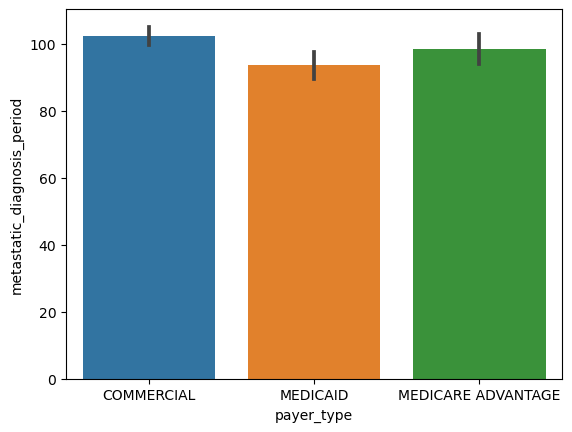

In [60]:
# if you impute the mode, I don't think it should be the entire column
# could you impute the mode for the region? 
# I guess commercial is still the mode by far, so maybe that's fine 
# ACTUALLY 

sns.barplot(data=data, x='payer_type', y='metastatic_diagnosis_period')

/Users/chonkcheto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='metastatic_diagnosis_period', ylabel='Density'>

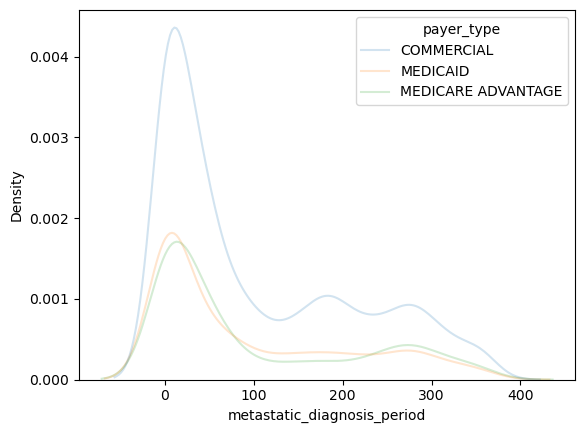

In [72]:
# ok at least VISUALLY it doesn't look like there's a major discrepancy between how long the metastatic diagnosis takes
# but hey this might not be the right way to visualize

sns.kdeplot(data=data, x='metastatic_diagnosis_period', hue='payer_type', alpha=0.2)

/Users/chonkcheto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='metastatic_diagnosis_period', ylabel='Density'>

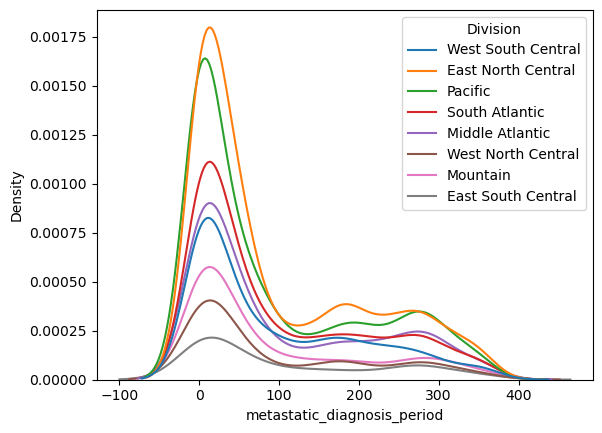

In [80]:
sns.kdeplot(data=data, x='metastatic_diagnosis_period', hue='Division')

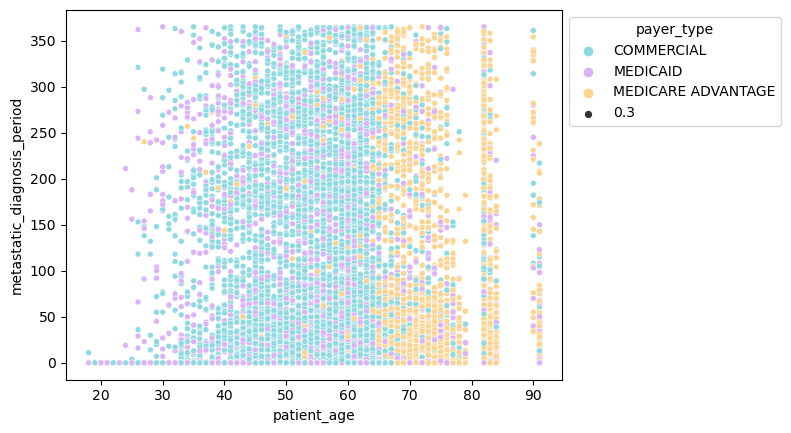

In [98]:
ax = sns.scatterplot(data=data, x='patient_age', y='metastatic_diagnosis_period', 
                     hue='payer_type', palette=['#8fd9e0', '#dab4f6', '#fbd492'], size=0.3)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

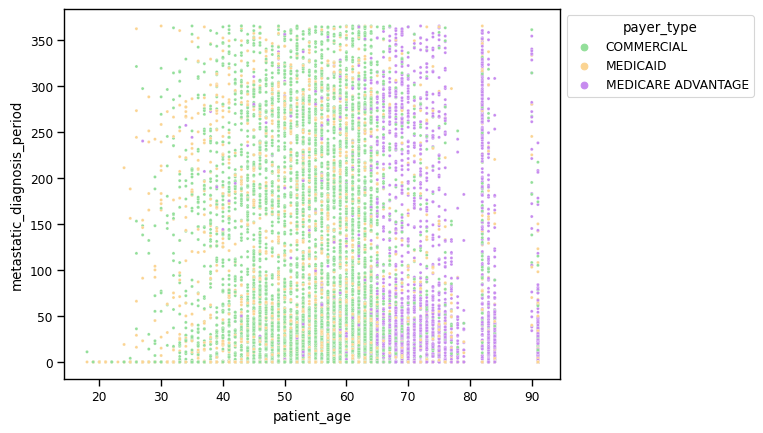

In [140]:
ax = sns.scatterplot(data=data, x='patient_age', y='metastatic_diagnosis_period', 
                     hue='payer_type', palette=['#93df9a', '#fbd492', '#c78bef'], s=5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

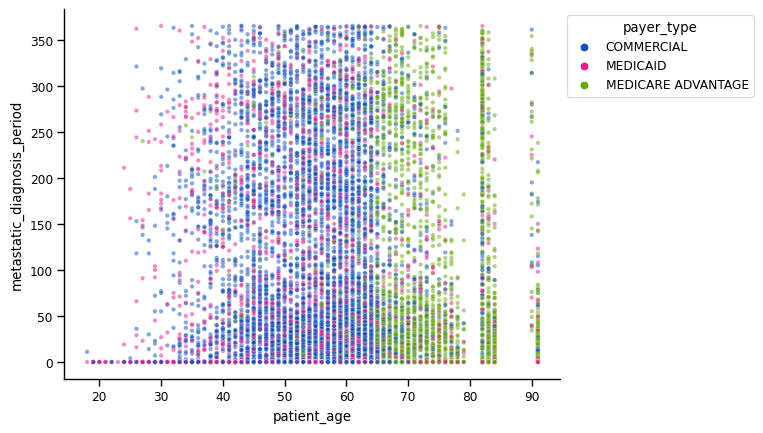

In [118]:
sns.set_context('paper')
ax = sns.scatterplot(data=data, x='patient_age', y='metastatic_diagnosis_period', 
                     hue='payer_type', palette=['#0551be', '#eb188a', '#60a800'], s=10, alpha=0.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
sns.despine()

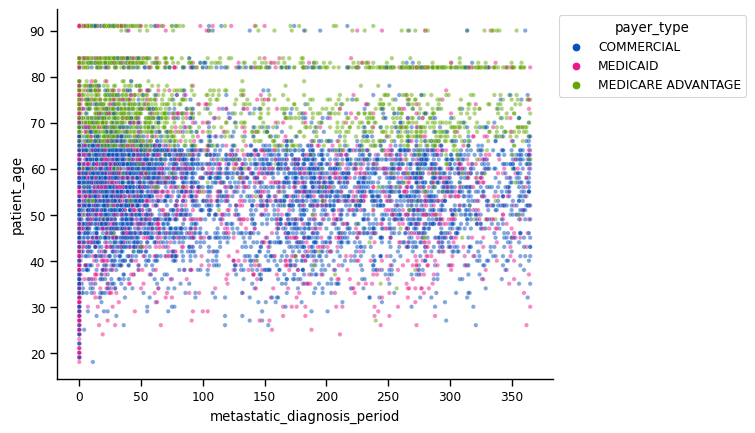

In [120]:
sns.set_context('paper')
ax = sns.scatterplot(data=data, x='metastatic_diagnosis_period', y='patient_age', 
                     hue='payer_type', palette=['#0551be', '#eb188a', '#60a800'], s=10, alpha=0.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [122]:
# getting distracted 
# I wanted to test if I could build a base random forest regressor without filling in the nulls 

X = patients
y = data['metastatic_diagnosis_period']

In [124]:
X.shape

(13173, 12)

In [126]:
y.shape

(13173,)

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [132]:
X_train.shape

(9879, 12)

In [134]:
y_train.shape

(9879,)

In [136]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   patient_id                        13173 non-null  int64 
 1   patient_race                      6516 non-null   object
 2   payer_type                        11408 non-null  object
 3   patient_state                     13173 non-null  object
 4   patient_zip3                      13173 non-null  int64 
 5   Region                            13173 non-null  object
 6   Division                          13173 non-null  object
 7   patient_age                       13173 non-null  int64 
 8   patient_gender                    13173 non-null  object
 9   breast_cancer_diagnosis_code      13173 non-null  object
 10  breast_cancer_diagnosis_desc      13173 non-null  object
 11  metastatic_cancer_diagnosis_code  13173 non-null  object
dtypes: int64(3), objec

In [144]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ohe.fit_transform(X[['patient_race', 'patient_zip3']])

<13173x757 sparse matrix of type '<class 'numpy.float64'>'
	with 26346 stored elements in Compressed Sparse Row format>

In [152]:
# columns with categorical values
# dropping: patient_id, patient_gender (because all have "F") 
# ignoring for now: breast_cancer_diagnosis_desc (because need some Tfidf) 
# just trying the most basic model 

cat = ['patient_race', 'payer_type', 'patient_state', 
       'patient_zip3', 'Region', 'Division',
       'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code']

In [154]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [178]:
ct = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat), ('age', 'passthrough', ['patient_age'])])

In [180]:
pipe = Pipeline([
    ('ct', ct), 
    ('rf', RandomForestRegressor())
])

In [182]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['patient_race', 'payer_type',
                                                   'patient_state',
                                                   'patient_zip3', 'Region',
                                                   'Division',
                                                   'breast_cancer_diagnosis_code',
                                                   'metastatic_cancer_diagnosis_code']),
                                                 ('age', 'passthrough',
                                                  ['patient_age'])])),
                ('rf', RandomForestRegressor())])

In [168]:
from sklearn.metrics import mean_squared_error

In [172]:
y_pred = pipe.predict(X_train) # broke because there were values that weren't OHE  

In [174]:
rmse = mean_squared_error(y_train, y_pred)
rmse

1066.3910587251753

In [176]:
# this number means nothing 
# but yay I still know how to set up a machine learning pipeline 

In [184]:
y_predb = pipe.predict(X_test)

In [186]:
rmseb = mean_squared_error(y_test, y_predb)
rmseb

7917.603266030724

In [188]:
# LOL the error is 7x the error for the training data 

In [190]:
# attempt on the test.csv 

test = pd.read_csv('test.csv')
test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,1746,Malignant neoplasm of axillary tail of female ...,C7981,NaN,NaN,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,1698.43,113973.9,671.07,37.23,21.30,36.81,26.95,9.74,5.21,14.94,38.47,49.41,8.08,12.89,4.88,66.51,29.06,0.40,0.37,0.10,0.66,2.91,2.52,20.33,27.62,0.55,29.71,8.18,5.79,51.34,53.19,54.23,64.00,72.08,81.10,80.89,82.15,79.95,68.38,53.90,48.64,42.32,48.58,54.30,64.82,71.66,80.19,80.20,81.40,77.97,68.84,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,4034.71,119537.2,806.92,31.42,15.22,31.24,34.65,12.87,6.00,18.88,36.55,56.90,8.38,10.64,1.40,54.08,26.66,0.80,8.35,0.13,4.83,5.14,10.76,17.82,

In [192]:
test_pred = pipe.predict(test)

In [194]:
test_pred[:100]

array([158.34      ,  71.44      , 167.94      , 207.04      ,
        46.12      , 257.71      ,  65.02      ,   9.63      ,
       143.05      ,   6.69      ,  53.69      ,  31.71      ,
       177.12      , 176.82666667,  11.47      ,  48.61      ,
        58.6       ,  18.95      ,  24.205     ,  33.45      ,
        19.82      ,  76.84      ,  50.2       ,  78.6       ,
        23.64      ,  26.97      ,  45.605     ,   4.05      ,
        42.62      ,  21.25      ,  20.91      ,  20.31      ,
        12.15      ,  77.83      , 236.43      , 188.92      ,
        78.75      ,  37.59      , 204.53      , 155.31      ,
        75.34      ,  33.76      , 262.935     , 165.74666667,
        37.63      ,  53.29      , 212.37      ,  57.58416667,
        26.42      ,  36.53      ,  28.57      ,  36.51      ,
        21.88      ,  39.94      ,  65.22333333,  23.06      ,
        55.79      ,  85.4       ,  43.36      , 198.        ,
        20.93      ,  89.515     ,  59.69      ,  17.99

In [196]:
test_round = np.round(test_pred)
test_round[:100]

array([158.,  71., 168., 207.,  46., 258.,  65.,  10., 143.,   7.,  54.,
        32., 177., 177.,  11.,  49.,  59.,  19.,  24.,  33.,  20.,  77.,
        50.,  79.,  24.,  27.,  46.,   4.,  43.,  21.,  21.,  20.,  12.,
        78., 236., 189.,  79.,  38., 205., 155.,  75.,  34., 263., 166.,
        38.,  53., 212.,  58.,  26.,  37.,  29.,  37.,  22.,  40.,  65.,
        23.,  56.,  85.,  43., 198.,  21.,  90.,  60.,  18.,  36.,  23.,
         7.,  69., 256., 248.,  39.,  52.,  32., 158.,  57.,  21.,  33.,
        80., 267., 247., 192.,  78.,  41.,  44.,  45.,  20.,  56., 100.,
       217.,  77.,  34.,  48., 150.,  34.,  44.,  36.,  38.,  32., 184.,
       202.])

In [198]:
test_int = np.rint(test_pred)
test_int[:100]

array([158.,  71., 168., 207.,  46., 258.,  65.,  10., 143.,   7.,  54.,
        32., 177., 177.,  11.,  49.,  59.,  19.,  24.,  33.,  20.,  77.,
        50.,  79.,  24.,  27.,  46.,   4.,  43.,  21.,  21.,  20.,  12.,
        78., 236., 189.,  79.,  38., 205., 155.,  75.,  34., 263., 166.,
        38.,  53., 212.,  58.,  26.,  37.,  29.,  37.,  22.,  40.,  65.,
        23.,  56.,  85.,  43., 198.,  21.,  90.,  60.,  18.,  36.,  23.,
         7.,  69., 256., 248.,  39.,  52.,  32., 158.,  57.,  21.,  33.,
        80., 267., 247., 192.,  78.,  41.,  44.,  45.,  20.,  56., 100.,
       217.,  77.,  34.,  48., 150.,  34.,  44.,  36.,  38.,  32., 184.,
       202.])

In [200]:
type(test_int)

numpy.ndarray

In [206]:
col1 = test['patient_id']
col2 = pd.Series(test_int)

submit1 = pd.concat([col1, col2], axis=1)
submit1.head()

,patient_id,0
0,730681,158.0
1,334212,71.0
2,571362,168.0
3,907331,207.0
4,208382,46.0


In [208]:
submit1.columns

Index(['patient_id', 0], dtype='object')

In [210]:
submit1 = submit1.rename(columns={0:'metastatic_diagnosis_period'})
submit1.head()

,patient_id,metastatic_diagnosis_period
0,730681,158.0
1,334212,71.0
2,571362,168.0
3,907331,207.0
4,208382,46.0


In [218]:
submit1.to_csv('sub1.csv', header=True, index=False)

In [214]:
submit1.shape

(5646, 2)

In [220]:
sub1 = pd.read_csv('sub1.csv')
sub1.head()

,patient_id,metastatic_diagnosis_period
0,730681,158.0
1,334212,71.0
2,571362,168.0
3,907331,207.0
4,208382,46.0


In [222]:
data['patient_zip3'].nunique()

751

In [224]:
temps = data.loc[:, 'Average of Jan-13':'Average of Dec-18']

In [226]:
geos = data.loc[:, ['patient_zip3', 'patient_state']]

In [228]:
geos.head()

,patient_zip3,patient_state
0,724,AR
1,629,IL
2,925,CA
3,900,CA
4,934,CA


In [230]:
import json

In [232]:
with open('threeDigitZipCodes.json', 'rb') as file:
    ref_zip3 = json.load(file)

In [236]:
ref_zip3['900']

{'id': '900', 'city': 'Los Angeles', 'state': 'CA'}

In [238]:
ref_zip3['900']['state']

'CA'

In [242]:
geos['state_check'] = geos['patient_zip3'].apply(lambda x: ref_zip3[str(x)]['state'])

In [244]:
geos.head()

,patient_zip3,patient_state,state_check
0,724,AR,AR
1,629,IL,IL
2,925,CA,CA
3,900,CA,CA
4,934,CA,CA


In [246]:
geos['match'] = np.where(geos['patient_state'] == geos['state_check'], True, False)
geos.head()

,patient_zip3,patient_state,state_check,match
0,724,AR,AR,True
1,629,IL,IL,True
2,925,CA,CA,True
3,900,CA,CA,True
4,934,CA,CA,True


In [248]:
geos['match'].sum()

13012

In [250]:
len(geos['match'])

13173

In [252]:
geos_mm = geos[geos['match']==False]
geos_mm.head()

,patient_zip3,patient_state,state_check,match
51,620,IL,MO,False
93,471,IN,KY,False
116,297,SC,NC,False
150,620,IL,MO,False
354,986,WA,OR,False


In [254]:
geos_mm.shape

(161, 4)

In [256]:
geos_mm['patient_zip3'].nunique()

24

In [263]:
geos_925 = data[data['patient_zip3']==925]
geos_925.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C773,NaN,NaN,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,12.4,11.58,10.47,6.38,3.28,49.99,50.01,48.81,11.9,34.35,4.95,3.8,52.89,78696.87,2.59,1.81,3.16,3.71,3.23,7.4,10.42,16.83,13.45,19.21,18.23,37.44,32818.54,66.82,10825.83,392600.4,1631.64,35.56,16.25,27.55,33.88,13.92,8.39,22.32,43.37,59.47,7.28,13.21,0.44,53.95,6.41,5.83,0.81,0.38,21.35,11.27,46.88,12.83,12.72,4.58,37.07,8.07,7.75,53.14,55.28,64.75,67.38,73.31,79.49,84.01,83.28,79.88,67.84,61.92,55.69,60.56,60.99,65.16,68.01,74.24,78.87,84.65,82.23,81.75,74.25,63.29,56.28,58.32,62.97,67.61,67.39,68.06,80.43,80.98,85.08,82.01,75.16,59.59,53.24,54.54,63.52,63.72,67.45,69.58,82.02,84.83,84.06,77.85,72.5,64.24,55.52,53.54,58.18,65.45,68.51,71.13,80.71,85.64,84.85,78.14,74.03,65.7,59.28,60.34,57.43,60.97,68.5,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
75,362734,Hispanic,MEDICARE ADVANTAGE,CA,925,West,Pacific,63,F,25.0,C50919,Malignant neoplasm of unsp site of unspecified...,C773,NaN,NaN,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,12.4,11.58,10.47,6.38,3.28,49.99,50.01,48.81,11.9,34.35,4.95,3.8,52.89,78696.87,2.59,1.81,3.16,3.71,3.23,7.4,10.42,16.83,13.45,19.21,18.23,37.44,32818.54,66.82,10825.83,392600.4,1631.64,35.56,16.25,27.55,33.88,13.92,8.39,22.32,43.37,59.47,7.28,13.21,0.44,53.95,6.41,5.83,0.8

/Users/chonkcheto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age_20s', ylabel='Count'>

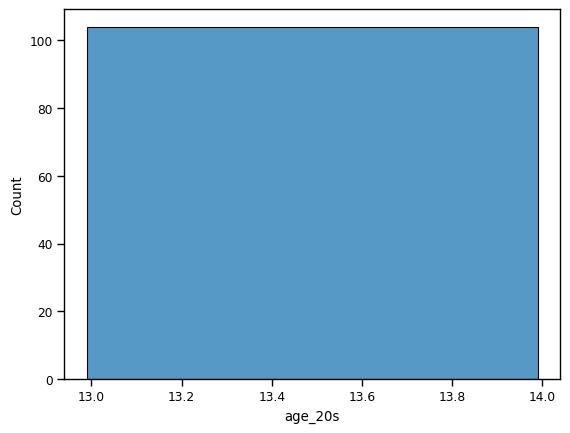

In [265]:
sns.histplot(data=geos_925, x='age_20s')

In [267]:
geos_925['age_20s'].isna().sum()

0

In [271]:
geos_925.isna().any().sum()

5

In [273]:
geos_925['bmi'].isna().sum()

61

In [275]:
geos_925.shape

(104, 152)

In [279]:
data['metastatic_cancer_diagnosis_code'].nunique()

43

<Axes: xlabel='income_household_six_figure', ylabel='metastatic_diagnosis_period'>

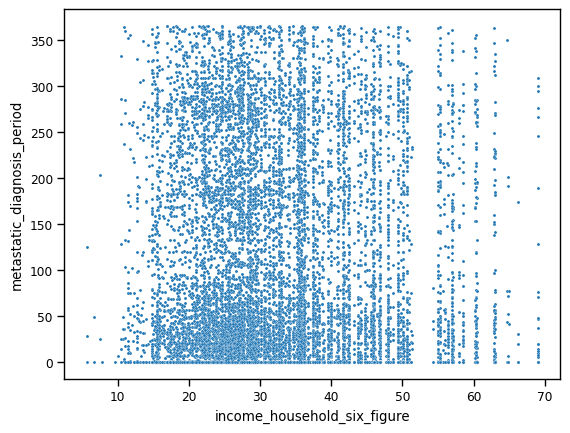

In [295]:
sns.scatterplot(data=data, x='income_household_six_figure', y='metastatic_diagnosis_period', s=5)

In [ ]:
# could probably do PCA for dimensional reduction before feeding into regressor 

In [297]:
# look at breast cancer diagnosis codes 

brc_codes = list(data['breast_cancer_diagnosis_code'].unique())
brc_codes

['C50912',
 'C50412',
 '1749',
 'C50911',
 '1748',
 'C50411',
 'C50212',
 'C50811',
 'C50919',
 'C50211',
 '1744',
 'C50012',
 'C50112',
 'C50812',
 'C50311',
 'C50011',
 'C50511',
 'C50512',
 '1741',
 'C50819',
 '1745',
 '1742',
 'C50312',
 '19881',
 'C50219',
 'C50111',
 'C50611',
 '1743',
 'C50612',
 'C5091',
 'C5011',
 'C50519',
 'C50421',
 'C50319',
 'C50419',
 'C5041',
 'C5081',
 '1746',
 'C5031',
 'C50922',
 'C50119',
 'C5001',
 'C50221',
 'C509',
 'C50019',
 'C50122',
 'C50619']

In [299]:
len(brc_codes)

47

In [305]:
brc_codes_sorted = sorted(brc_codes)

In [307]:
brc_codes_sorted[:20]

['1741',
 '1742',
 '1743',
 '1744',
 '1745',
 '1746',
 '1748',
 '1749',
 '19881',
 'C5001',
 'C50011',
 'C50012',
 'C50019',
 'C5011',
 'C50111',
 'C50112',
 'C50119',
 'C50122',
 'C50211',
 'C50212']

In [309]:
# take out the icd9 codes
icd9 = ['1741', '1742', '1743', '1744', '1745', '1746', '1748', '1749', '19881']

icd9to10 = {'1741':'C50119', '1742':'C50219', '1743', '1744', '1745', '1746', '1748', '1749', '19881':'C7981'}

# maybe using the descriptions will be better 
# since some of the ICD-9 codes don't have corresponding ICD-10 codes that already exist in the data 
# plus what if the test data has codes that don't map at all 
# originally thought to use CountVectorizer as a simple first pass 
# but there are a lot of "metastasis of..." or "neoplasm of..." in the descriptions column
# so I'll start with TfidfVectorizer 

array([False,  True])

In [311]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [329]:
cat = ['patient_race', 'payer_type', 'patient_state', 
       'patient_zip3', 'Region', 'Division',
       'metastatic_cancer_diagnosis_code'] # removed breast_cancer_diagnosis_code column from this list

txt = ['breast_cancer_diagnosis_desc']

num = ['patient_age']

ct2 = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat)
])

pipe4 = Pipeline([
    ('ct', ct2), 
    ('reg', RandomForestRegressor())
])

In [331]:
pipe4.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['patient_race', 'payer_type',
                                                   'patient_state',
                                                   'patient_zip3', 'Region',
                                                   'Division',
                                                   'metastatic_cancer_diagnosis_code'])])),
                ('reg', RandomForestRegressor())])

In [333]:
# something with the TFIDF Vectorizer is causing the pipeline to break
# need to troubleshoot

In [335]:
y_pred4 = pipe4.predict(X_train)

In [337]:
rmse4 = mean_squared_error(y_train, y_pred4)

In [339]:
rmse4

4719.939044591246

In [341]:
y_pred4b = pipe4.predict(X_test)

In [343]:
rmse4b = mean_squared_error(y_test, y_pred4b)
rmse4b

14540.39255379759

In [345]:
# bigger number than before 
# this pipe doesn't have age or anything about the breast_cancer_diagnosis_code or _desc

In [347]:
tf = TfidfVectorizer()

demo_desc = ['malignant neoplasm of the breast', 'malignant neoplasm of the breast, upper left', 'ductal cancer in situ']

tf.fit_transform(demo_desc)

<3x11 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [349]:
ct2 = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat), 
    ('age', 'passthrough', num)
])

pipe5 = Pipeline([
    ('ct', ct2), 
    ('reg', RandomForestRegressor())
])

In [351]:
pipe5.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['patient_race', 'payer_type',
                                                   'patient_state',
                                                   'patient_zip3', 'Region',
                                                   'Division',
                                                   'metastatic_cancer_diagnosis_code']),
                                                 ('age', 'passthrough',
                                                  ['patient_age'])])),
                ('reg', RandomForestRegressor())])

In [353]:
y5 = pipe5.predict(X_test)

In [355]:
rmse5 = mean_squared_error(y_test, y5)
rmse5

13440.049897865967

In [357]:
ct2 = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat), 
    ('txt', TfidfVectorizer(), txt),
    ('age', 'passthrough', num)
])

pipe6 = Pipeline([
    ('ct', ct2), 
    ('reg', RandomForestRegressor())
])

In [359]:
pipe6.fit(X_train, y_train)

ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 1, expected 9879.

In [361]:
data['breast_cancer_diagnosis_desc'].isna().sum() # ok we don't have any missing values in this column

0

In [363]:
tfidf = TfidfVectorizer()

tfidf.fit_transform(data['breast_cancer_diagnosis_desc'])

<13173x31 sparse matrix of type '<class 'numpy.float64'>'
	with 104709 stored elements in Compressed Sparse Row format>

In [365]:
ct_text = ColumnTransformer([
    ('text', TfidfVectorizer(), 'breast_cancer_diagnosis_desc')
])

pipe_text = Pipeline([
    ('text', ct_text), 
    ('reg', RandomForestRegressor())
])

In [367]:
pipe_text.fit(X_train, y_train) # let's see if this will break

Pipeline(steps=[('text',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'breast_cancer_diagnosis_desc')])),
                ('reg', RandomForestRegressor())])

In [369]:
y_text = pipe_text.predict(X_test)

In [371]:
rmse_text = mean_squared_error(y_test, y_text)
rmse_text

7125.979934692867

In [373]:
ct_text1 = ColumnTransformer([
    ('text', TfidfVectorizer(ngram_range=(1,2)), 'breast_cancer_diagnosis_desc')
])

pipe_text1 = Pipeline([
    ('text', ct_text), 
    ('reg', RandomForestRegressor())
])

In [375]:
pipe_text1.fit(X_train, y_train)

Pipeline(steps=[('text',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'breast_cancer_diagnosis_desc')])),
                ('reg', RandomForestRegressor())])

In [377]:
y_text1 = pipe_text1.predict(X_test)

In [379]:
rmse_text1 = mean_squared_error(y_test, y_text1)
rmse_text1

7125.341633518393

In [387]:
# interesting that the error for ngram_range(1,1) is the same as if we set ngram_range(1,2)
# look into the most common description

data['breast_cancer_diagnosis_desc'].mode()

0    Malignant neoplasm of breast (female), unspeci...
Name: breast_cancer_diagnosis_desc, dtype: object

In [389]:
# now that I can make a pipeline with JUST the text data, let's try combining it with the other columns

ct_combo = ColumnTransformer([
    ('text', TfidfVectorizer(ngram_range=(1,2)), 'breast_cancer_diagnosis_desc'), 
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat)
])

pipe_combo = Pipeline([
    ('features', ct_combo), 
    ('reg', RandomForestRegressor())
])

In [391]:
pipe_combo.fit(X_train, y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'breast_cancer_diagnosis_desc'),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['patient_race', 'payer_type',
                                                   'patient_state',
                                                   'patient_zip3', 'Region',
                                                   'Division',
                                                   'metastatic_cancer_diagnosis_code'])])),
                ('reg', RandomForestRegressor())])

In [393]:
y_pred_combo = pipe_combo.predict(X_test)

In [395]:
rmse_combo = mean_squared_error(y_test, y_pred_combo)
rmse_combo

8269.740070089394

In [405]:
# ok yay this didn't break 
# let's add the age data 
# apparently it doesn't like 'passthrough' -- let's just put the column through the StandardScaler then 

from sklearn.preprocessing import StandardScaler

age = ['patient_age']

features = ColumnTransformer([
    ('text', TfidfVectorizer(ngram_range=(1,2)), 'breast_cancer_diagnosis_desc'), 
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat), 
    ('age', StandardScaler(), age)
])

pipe_combo2 = Pipeline([
    ('features', features), 
    ('reg', RandomForestRegressor())
])

In [407]:
pipe_combo2.fit(X_train, y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'breast_cancer_diagnosis_desc'),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['patient_race', 'payer_type',
                                                   'patient_state',
                                                   'patient_zip3', 'Region',
                                                   'Division',
                                                   'metastatic_cancer_diagnosis_code']),
                                                 ('age', StandardScaler(),
                                                  ['patient_age'])])),
                ('reg', RandomForestRegressor())])

In [409]:
y_pred_c2 = pipe_combo2.predict(X_test)

In [411]:
rmse_c2 = mean_squared_error(y_test, y_pred_c2)
rmse_c2

7811.226564160595

In [413]:
y_sub2 = pipe_combo2.predict(test)
y_sub2[:100]

array([140.162     ,  50.5       , 195.86      , 212.15      ,
        61.57      , 257.0325    ,  61.47      ,  17.14      ,
        48.55      ,  11.8       ,  57.25      ,  63.75      ,
       202.05      , 183.295     ,  22.27      ,  39.14      ,
        63.63      ,  27.71      ,  61.475     ,  42.01      ,
        16.15      ,  76.00666667,  50.36      , 101.68      ,
        27.61      ,  28.61      ,  42.815     ,  15.84      ,
        49.71      ,  18.93      ,  29.72      ,  17.31      ,
        18.76      ,  99.215     , 221.42      , 169.02      ,
        91.74      ,  54.05      , 191.84      , 137.74      ,
        79.37      ,  33.02      , 256.04857143, 161.9       ,
        45.06      ,  38.85      , 176.58      ,  53.65      ,
        17.92      ,  44.13      ,  20.77      ,  35.        ,
        19.96      ,  53.92      ,  39.99      ,  10.29      ,
        58.47666667,  93.1       ,  37.76      , 216.28      ,
        24.67      ,  99.06      ,  58.76      ,   9.75

In [415]:
y_sub2_rnd = np.rint(y_sub2)

ser = pd.Series(y_sub2_rnd)

In [417]:
col1 = test['patient_id']

submit2 = pd.concat([col1, ser], axis=1)
submit2.head()

,patient_id,0
0,730681,140.0
1,334212,50.0
2,571362,196.0
3,907331,212.0
4,208382,62.0


In [419]:
submit2 = submit2.rename(columns={0:'metastatic_diagnosis_period'})
submit2.head()

,patient_id,metastatic_diagnosis_period
0,730681,140.0
1,334212,50.0
2,571362,196.0
3,907331,212.0
4,208382,62.0


In [421]:
submit2.to_csv('sub2.csv', header=True, index=False)

In [423]:
# gut check that it's in the right format

sub2_df = pd.read_csv('sub2.csv')
sub2_df.head()

,patient_id,metastatic_diagnosis_period
0,730681,140.0
1,334212,50.0
2,571362,196.0
3,907331,212.0
4,208382,62.0


In [430]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chonkcheto/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [432]:
# let's try adding stopwords to the TFIDF Vectorizer 

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [434]:
age = ['patient_age']

features = ColumnTransformer([
    ('text', TfidfVectorizer(stop_words=stop_words, ngram_range=(1,3), max_df=0.9), 'breast_cancer_diagnosis_desc'),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
    ('age', StandardScaler(), age)
])

pipe_v3 = Pipeline([
    ('features', features), 
    ('reg', RandomForestRegressor())
])

In [436]:
pipe_v3.fit(X_train, y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_df=0.9,
                                                                  ngram_range=(1,
                                                                               3),
                                                                  stop_words=['i',
                                                                              'me',
                                                                              'my',
                                                                              'myself',
                                                                              'we',
                                                                              'our',
                                                                              'ours',
                                                                              'ourselves',
                                                                              'you',
                                                                              "you're",
                                                                              "you've",
                                                                              "you'll",
                                                                              "you'd",
                                                                              'your',
                                                                              'yours',
                                                                              'yourself',
                                                                              'yourselves',
                                                                              'he',
                                                                              'him',
                                                                              'his',
                                                                              'himself',
                                                                              'she',
                                                                              "she's",
                                                                              'her',
                                                                              'hers',
                                                                              'herself',
                                                                              'it',
                                                                              "it's",
                                                                              'its',
                                                                              'itself', ...]),
                                                  'breast_cancer_diagnosis_desc'),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['patient_race', 'payer_type',
                                                   'patient_state',
                                                   'patient_zip3', 'Region',
                                                   'Division',
                                                   'metastatic_cancer_diagnosis_code']),
                                                 ('age', StandardScaler(),
                                                  ['patient_age'])])),
                ('reg', RandomForestRegressor())])

In [438]:
v3_pred = pipe_v3.predict(X_test)

In [440]:
v3_mse = mean_squared_error(y_test, v3_pred)
v3_mse

7888.055458238517

In [445]:
y3 = pipe_v3.predict(test)
y3[:20]

array([166.85  ,  56.55  , 193.9   , 209.41  ,  71.34  , 249.56  ,
        68.99  ,  23.78  , 106.58  ,  13.45  ,  54.3   ,  41.33  ,
       172.18  , 194.31  ,  23.52  ,  46.73  ,  56.98  ,  19.65  ,
        43.3575,  34.28  ])

In [447]:
y3_rnd = np.rint(y3)

y3_col = pd.Series(y3_rnd)

sub3 = pd.concat([col1, y3_col], axis=1)
sub3.head()

,patient_id,0
0,730681,167.0
1,334212,57.0
2,571362,194.0
3,907331,209.0
4,208382,71.0


In [449]:
sub3 = sub3.rename(columns={0:'metastatic_diagnosis_period'})
sub3.head()

,patient_id,metastatic_diagnosis_period
0,730681,167.0
1,334212,57.0
2,571362,194.0
3,907331,209.0
4,208382,71.0


In [451]:
sub3.to_csv('sub3.csv', header=True, index=False)

In [453]:
sub3_df = pd.read_csv('sub3.csv')
sub3_df.head()

,patient_id,metastatic_diagnosis_period
0,730681,167.0
1,334212,57.0
2,571362,194.0
3,907331,209.0
4,208382,71.0


In [458]:
# ok the tweaked TfidfVectorizer did sliiightly worse 
# let's find out which features are important 

pipe_v3[1]

RandomForestRegressor()

In [460]:
fi = pipe_v3[1].feature_importances_

In [462]:
fi_array = pd.Series(fi, index=feature)

array([2.68715084e-04, 6.16365699e-07, 1.71675066e-04, ...,
       2.40229449e-03, 2.20813125e-03, 6.43626190e-02])

In [464]:
pipe_v3[1].n_features_in_

1039

In [466]:
# lots of features because of Tfidf presumably

pipe_v3[1].feature_names_in_ # can't call this, I'm guessing because of the one-hot encoding? Or the Tfidf with ngrams > 1

AttributeError: 'RandomForestRegressor' object has no attribute 'feature_names_in_'

In [470]:
pipe_v3[0]

ColumnTransformer(transformers=[('text',
                                 TfidfVectorizer(max_df=0.9, ngram_range=(1, 3),
                                                 stop_words=['i', 'me', 'my',
                                                             'myself', 'we',
                                                             'our', 'ours',
                                                             'ourselves', 'you',
                                                             "you're", "you've",
                                                             "you'll", "you'd",
                                                             'your', 'yours',
                                                             'yourself',
                                                             'yourselves', 'he',
                                                             'him', 'his',
                                                             'himself', 'she',
                                                             "she's", 'her',
                                                             'hers', 'herself',
                                                             'it', "it's",
                                                             'its', 'itself', ...]),
                                 'breast_cancer_diagnosis_desc'),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['patient_race', 'payer_type', 'patient_state',
                                  'patient_zip3', 'Region', 'Division',
                                  'metastatic_cancer_diagnosis_code']),
                                ('age', StandardScaler(), ['patient_age'])])

In [482]:
pipe_v3[0].named_transformers_['text']

TfidfVectorizer(max_df=0.9, ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [484]:
pipe_v3[0].named_transformers_['cat']

OneHotEncoder(handle_unknown='ignore')

In [490]:
tfidf_vocabulary = pipe_v3[0].named_transformers_['text'].vocabulary_

# a mapping of terms to feature indices
# so index 0 is "areola", 
# index 1 is "areola female"
# index 53 is "malignant"

### Custom preprocessor for breast cancer diagnosis description

In [601]:
from preprocess_text import MedicalTermsCleaner

steps = Pipeline([
    ('tidy', MedicalTermsCleaner()),
    ('tfidf', TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2)))
])

features = ColumnTransformer([
    ('text', steps, 'breast_cancer_diagnosis_code'),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
    ('num', StandardScaler(), age)
])

pipe_v5 = Pipeline([
    ('features', features),
    ('forest', RandomForestRegressor(min_samples_split=10))
])

In [603]:
pipe_v5.fit(X_train, y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tidy',
                                                                   MedicalTermsCleaner()),
                                                                  ('tfidf',
                                                                   TfidfVectorizer(ngram_range=(1,
                                                                                                2),
                                                                                   stop_words=['i',
                                                                                               'me',
                                                                                               'my',
                                                                                               'myself',
                                                                                               'we',
                                                                                               'our',
                                                                                               'ours',
                                                                                               'ourselves',
                                                                                               'you',
                                                                                               "you're",
                                                                                               "you've",
                                                                                               "you'll",
                                                                                               "you'd",
                                                                                               'your',
                                                                                               'yours',
                                                                                               'yourself',
                                                                                               'yourselves',
                                                                                               'he',
                                                                                               'him',
                                                                                               'his',
                                                                                               'himself',
                                                                                               'she',
                                                                                               "she's",
                                                                                               'her',
                                                                                               'hers',
                                                                                               'herself',
                                                                                               'it',
                                                                                               "it's",
                                                                                               'its',
                                                                                               'itself', ...]))]),
                                                  'breast_cancer_diagnosis_code'),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['patient_race', 'payer_type',
                                               

In [597]:
# ALL CELLS BELOW NEED TO BE UPDATED TO v5 AND RERUN

# calculate mse for training data 

ytrain_pred4 = pipe_v4.predict(X_train)
mse_v4 = mean_squared_error(y_train, ytrain_pred4)
mse_v4

2412.9538495945403

In [599]:
y5 = pipe_v5.predict(X_test)
mse4 = mean_squared_error(y_test, y4)
mse4

ValueError: Found unknown categories [169, 248, 259, 264, 266, 267, 388, 470, 512, 572, 574, 651, 691, 739, 743, 749, 798, 827, 829, 859, 994] in column 3 during transform